In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

In [2]:
df_train = pd.read_csv("spaceship-titanic/train.csv")

In [3]:
df_test = pd.read_csv("spaceship-titanic/test.csv")

In [4]:
df_test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [5]:
df_train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [7]:
df_train["HomePlanet"].value_counts()

HomePlanet
Earth     4602
Europa    2131
Mars      1759
Name: count, dtype: int64

In [8]:
df_train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


<Figure size 1800x1000 with 0 Axes>

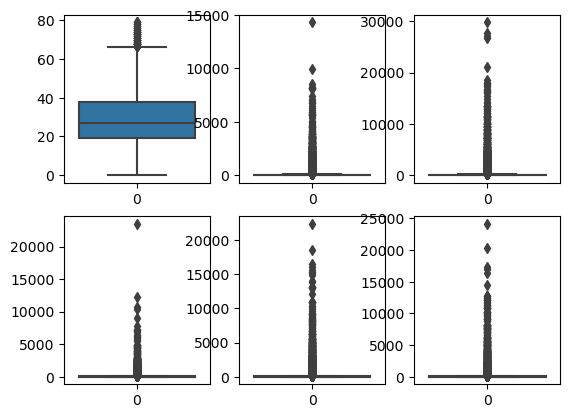

In [9]:
plt.figure(figsize=(18,10))
fig, ax = plt.subplots(2, 3) 
sns.boxplot(df_train["Age"], ax=ax[0,0])
sns.boxplot(df_train["RoomService"], ax=ax[0,1])
sns.boxplot(df_train["FoodCourt"], ax=ax[0,2])
sns.boxplot(df_train["ShoppingMall"], ax=ax[1,0])
sns.boxplot(df_train["Spa"], ax=ax[1,1])
sns.boxplot(df_train["VRDeck"], ax=ax[1,2])
plt.show()

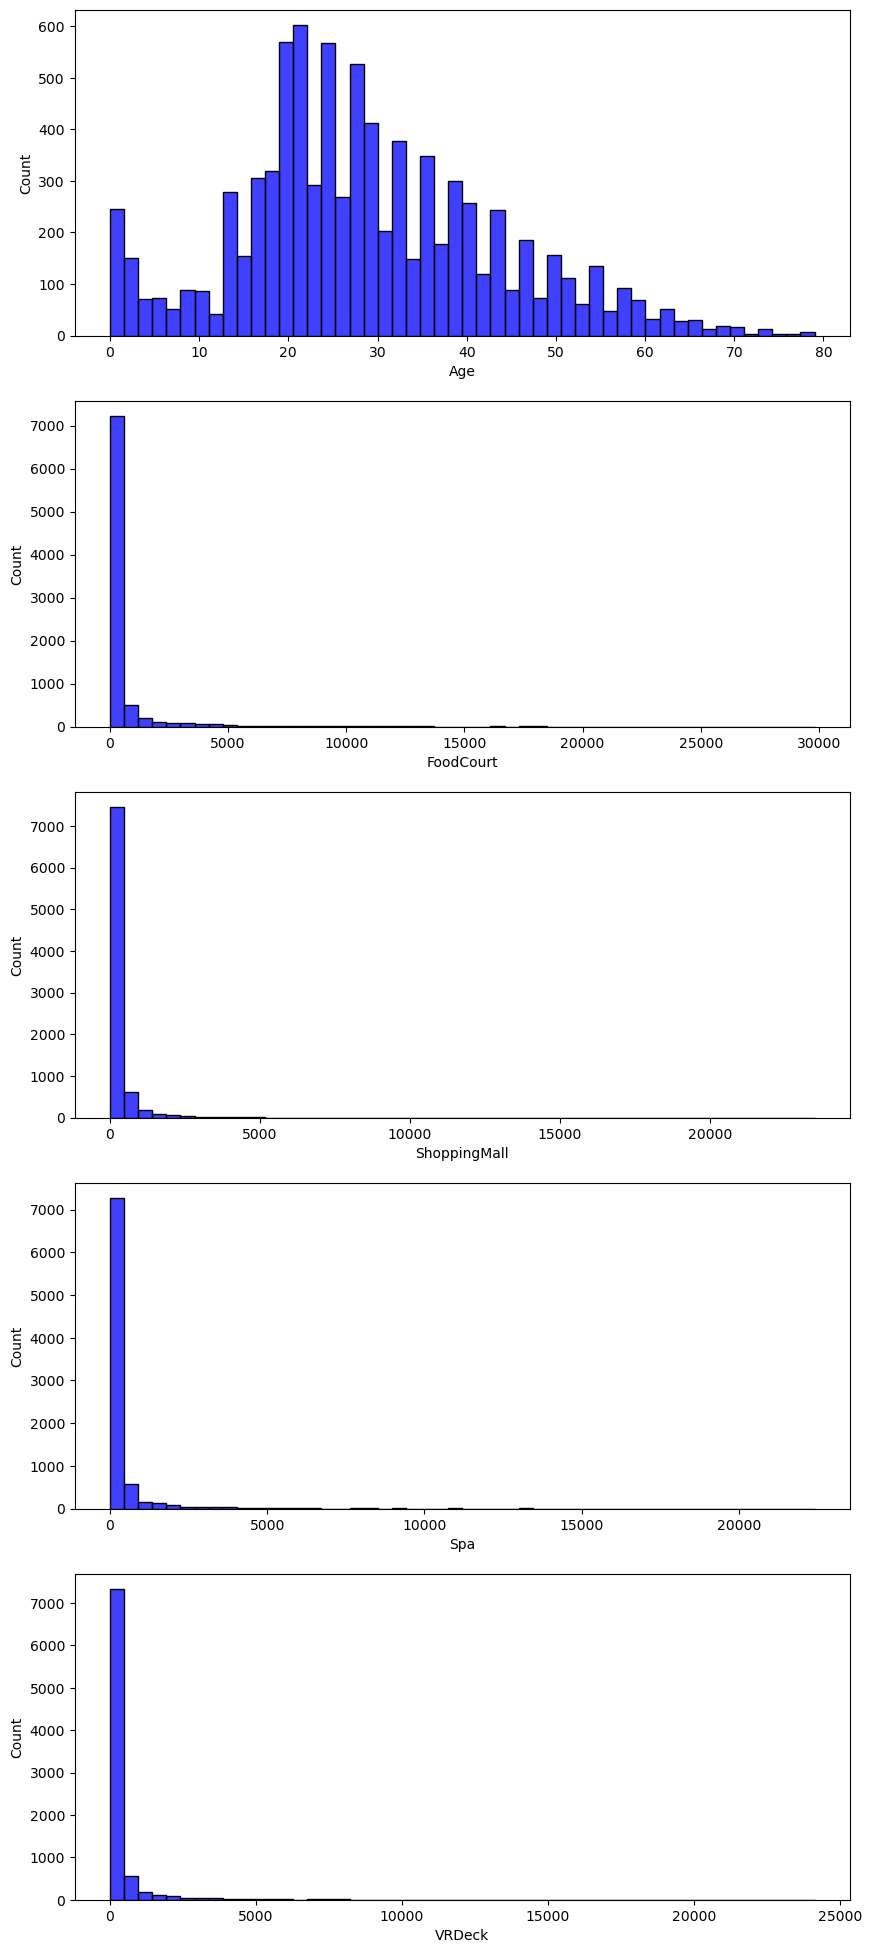

In [10]:
fig, ax = plt.subplots(5,1,  figsize=(10, 10))
plt.subplots_adjust(top = 2)

sns.histplot(df_train['Age'], color='b', bins=50, ax=ax[0]);
sns.histplot(df_train['FoodCourt'], color='b', bins=50, ax=ax[1]);
sns.histplot(df_train['ShoppingMall'], color='b', bins=50, ax=ax[2]);
sns.histplot(df_train['Spa'], color='b', bins=50, ax=ax[3]);
sns.histplot(df_train['VRDeck'], color='b', bins=50, ax=ax[4]);

In [11]:
df_train.duplicated().sum()

0

In [12]:
df_train.select_dtypes("object").columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP',
       'Name'],
      dtype='object')

In [13]:
for x in df_train.select_dtypes(np.number).columns:    
    percentile25 = df_train[x].quantile(0.25)

    # Compute the 75th percentile value in `tenure`
    percentile75 = df_train[x].quantile(0.75)

    # Compute the interquartile range in `tenure`
    iqr = percentile75 - percentile25

    # Define the upper limit and lower limit for non-outlier values in `tenure`
    upper_limit = percentile75 + 1.5 * iqr
    lower_limit = percentile25 - 1.5 * iqr
    print("Lower limit:", lower_limit)
    print("Upper limit:", upper_limit)

    # Identify subset of data containing outliers in `tenure`
    outliers = df_train[(df_train[x] > upper_limit) | (df_train[x] < lower_limit)]

    # Count how many rows in the data contain outliers in `tenure`
    print(f'Number of rows in the data containing outliers in {x}:{len(outliers)}')

Lower limit: -9.5
Upper limit: 66.5
Number of rows in the data containing outliers in Age:77
Lower limit: -70.5
Upper limit: 117.5
Number of rows in the data containing outliers in RoomService:1861
Lower limit: -114.0
Upper limit: 190.0
Number of rows in the data containing outliers in FoodCourt:1823
Lower limit: -40.5
Upper limit: 67.5
Number of rows in the data containing outliers in ShoppingMall:1829
Lower limit: -88.5
Upper limit: 147.5
Number of rows in the data containing outliers in Spa:1788
Lower limit: -69.0
Upper limit: 115.0
Number of rows in the data containing outliers in VRDeck:1809


In [14]:
df_train.shape

(8693, 14)

In [15]:
df_train.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [16]:
df_train.drop(columns=["PassengerId", "Name"], inplace=True)

In [17]:
df_train.isnull().sum().sort_values(ascending=False)

CryoSleep       217
ShoppingMall    208
VIP             203
HomePlanet      201
Cabin           199
VRDeck          188
FoodCourt       183
Spa             183
Destination     182
RoomService     181
Age             179
Transported       0
dtype: int64

In [18]:
df_train[['VIP', 'CryoSleep', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']] = df_train[['VIP', 'CryoSleep', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].fillna(value=0)
df_train.isnull().sum().sort_values(ascending=False)

HomePlanet      201
Cabin           199
Destination     182
RoomService     181
Age             179
CryoSleep         0
VIP               0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Transported       0
dtype: int64

In [19]:
df_train["Transported"]

0       False
1        True
2       False
3       False
4        True
        ...  
8688    False
8689    False
8690     True
8691    False
8692     True
Name: Transported, Length: 8693, dtype: bool

In [20]:
for label in ["Transported", "VIP", "CryoSleep"]:
    df_train[label] = df_train[label].astype(int)

In [21]:
df_train[["Deck", "Cabin_num", "Side"]] = df_train["Cabin"].str.split("/", expand=True)

In [22]:
df_train = df_train.drop('Cabin', axis=1)

In [23]:
df_train.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Cabin_num,Side
0,Europa,0,TRAPPIST-1e,39.0,0,0.0,0.0,0.0,0.0,0.0,0,B,0,P
1,Earth,0,TRAPPIST-1e,24.0,0,109.0,9.0,25.0,549.0,44.0,1,F,0,S
2,Europa,0,TRAPPIST-1e,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0,A,0,S
3,Europa,0,TRAPPIST-1e,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0,A,0,S
4,Earth,0,TRAPPIST-1e,16.0,0,303.0,70.0,151.0,565.0,2.0,1,F,1,S


In [24]:
df_train["Destination"].value_counts()

Destination
TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: count, dtype: int64

In [25]:
df_train["HomePlanet"].unique()

array(['Europa', 'Earth', 'Mars', nan], dtype=object)

In [26]:
df = pd.get_dummies(df_train, columns=["HomePlanet", "Destination", "Deck", "Side"])

In [27]:
df

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Cabin_num,...,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Side_P,Side_S
0,0,39.0,0,0.0,0.0,0.0,0.0,0.0,0,0,...,False,True,False,False,False,False,False,False,True,False
1,0,24.0,0,109.0,9.0,25.0,549.0,44.0,1,0,...,False,False,False,False,False,True,False,False,False,True
2,0,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0,0,...,True,False,False,False,False,False,False,False,False,True
3,0,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0,0,...,True,False,False,False,False,False,False,False,False,True
4,0,16.0,0,303.0,70.0,151.0,565.0,2.0,1,1,...,False,False,False,False,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,0,41.0,1,0.0,6819.0,0.0,1643.0,74.0,0,98,...,True,False,False,False,False,False,False,False,True,False
8689,1,18.0,0,0.0,0.0,0.0,0.0,0.0,0,1499,...,False,False,False,False,False,False,True,False,False,True
8690,0,26.0,0,0.0,0.0,1872.0,1.0,0.0,1,1500,...,False,False,False,False,False,False,True,False,False,True
8691,0,32.0,0,0.0,1049.0,0.0,353.0,3235.0,0,608,...,False,False,False,False,True,False,False,False,False,True


In [28]:
df.fillna(method="ffill", inplace=True)

In [29]:
df.isna().sum()

CryoSleep                    0
Age                          0
VIP                          0
RoomService                  0
FoodCourt                    0
ShoppingMall                 0
Spa                          0
VRDeck                       0
Transported                  0
Cabin_num                    0
HomePlanet_Earth             0
HomePlanet_Europa            0
HomePlanet_Mars              0
Destination_55 Cancri e      0
Destination_PSO J318.5-22    0
Destination_TRAPPIST-1e      0
Deck_A                       0
Deck_B                       0
Deck_C                       0
Deck_D                       0
Deck_E                       0
Deck_F                       0
Deck_G                       0
Deck_T                       0
Side_P                       0
Side_S                       0
dtype: int64

In [30]:
X = df.drop("Transported", axis=1)
y = df["Transported"]

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [58]:
rf = RandomForestClassifier(random_state=0)

# Assign a dictionary of hyperparameters to search over
cv_params = {'n_estimators':[50,60,100,150],
             'max_depth':[4, 6, 8, None],
             'min_samples_leaf': [2, 5, 1],
             'min_samples_split': [2, 4, 6]
             }

# Assign a dictionary of scoring metrics to capture
scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

# Instantiate GridSearch
rf1 = GridSearchCV(rf, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [59]:
rf1.fit(X_train, y_train)

GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [4, 6, 8, None],
                         'min_samples_leaf': [2, 5, 1],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [50, 60, 100, 150]},
             refit='roc_auc',
             scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'])

In [60]:
rf1.best_score_

0.8925104990260398

In [34]:
df_test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [35]:
df_test.drop(columns=["PassengerId", "Name"], inplace=True)

In [36]:
df_test[['VIP', 'CryoSleep', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']] = df_test[['VIP', 'CryoSleep', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].fillna(value=0)
df_test.isnull().sum().sort_values(ascending=False)

Cabin           100
Destination      92
Age              91
HomePlanet       87
RoomService      82
CryoSleep         0
VIP               0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
dtype: int64

In [37]:
for label in ["VIP", "CryoSleep"]:
    df_test[label] = df_test[label].astype(int)
df_test[["Deck", "Cabin_num", "Side"]] = df_test["Cabin"].str.split("/", expand=True)
df_test = df_test.drop('Cabin', axis=1)
df_test = pd.get_dummies(df_test, columns=["HomePlanet", "Destination", "Deck", "Side"])
df_test.fillna(method="ffill", inplace=True)

In [38]:
df_test

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Cabin_num,HomePlanet_Earth,...,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Side_P,Side_S
0,1,27.0,0,0.0,0.0,0.0,0.0,0.0,3,True,...,False,False,False,False,False,False,True,False,False,True
1,0,19.0,0,0.0,9.0,0.0,2823.0,0.0,4,True,...,False,False,False,False,False,True,False,False,False,True
2,1,31.0,0,0.0,0.0,0.0,0.0,0.0,0,False,...,False,False,True,False,False,False,False,False,False,True
3,0,38.0,0,0.0,6652.0,0.0,181.0,585.0,1,False,...,False,False,True,False,False,False,False,False,False,True
4,0,20.0,0,10.0,0.0,635.0,0.0,0.0,5,True,...,False,False,False,False,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,1,34.0,0,0.0,0.0,0.0,0.0,0.0,1496,True,...,False,False,False,False,False,False,True,False,False,True
4273,0,42.0,0,0.0,847.0,17.0,10.0,144.0,1496,True,...,False,False,False,False,False,False,False,False,False,False
4274,1,42.0,0,0.0,0.0,0.0,0.0,0.0,296,False,...,False,False,False,True,False,False,False,False,True,False
4275,0,42.0,0,0.0,2680.0,0.0,0.0,523.0,297,False,...,False,False,False,True,False,False,False,False,True,False


In [61]:
y_pred = rf1.predict(X_test)

In [62]:
y_pred.shape

(2869,)

In [63]:
accuracy_score(y_test, y_pred)

0.7953990937608924

In [64]:
predictions = rf1.predict(df_test)

In [65]:
transformed_pred = predictions.astype(bool)
transformed_pred

array([ True, False,  True, ...,  True,  True,  True])

In [66]:
sample = pd.read_csv("spaceship-titanic/sample_submission.csv")
submission_df = pd.DataFrame({"PassengerId":sample["PassengerId"], "Transported":transformed_pred})
submission_df.head()

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True


In [67]:
accuracy_score(sample["Transported"], transformed_pred)

0.5090016366612111

In [68]:
submission_df.to_csv("spaceship_titanic_submission_rf1.csv", index=False)